# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
import pandas as pd
import numpy as np

In [3]:
#
# Cook data :)
#
geo = pd.read_excel('Clustering/geo.xlsx')
geocomm = pd.read_excel('Clustering/geo_comment.xlsx')

In [4]:
geo.head()
geo['x'].value_counts().head()

37.442095    7338
37.454528    3616
37.559640    3563
37.685934    2962
37.805293    2816
Name: x, dtype: int64

In [5]:
geocomm.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [6]:
geocomm['x'].value_counts().head()

37.442095    7338
37.454528    3616
37.685934    2962
37.805293    2816
37.570887    2804
Name: x, dtype: int64

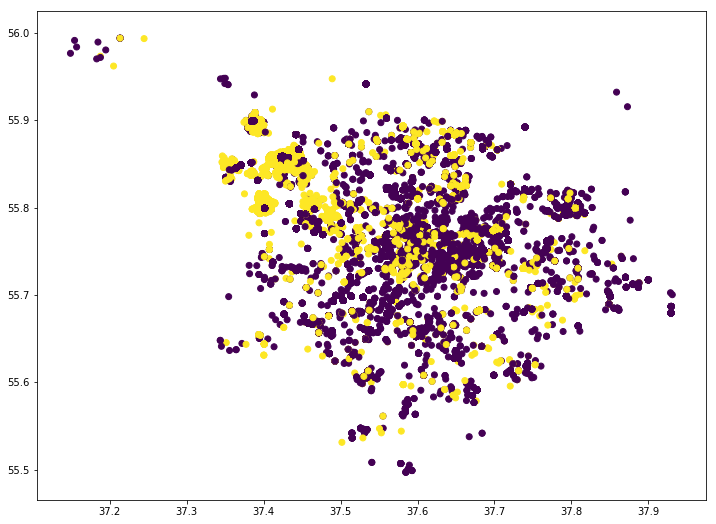

In [7]:
# plot map with vote
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,9))
plt.scatter(geocomm['x'], geocomm['y'],c=geocomm['comment_class'])
plt.show()

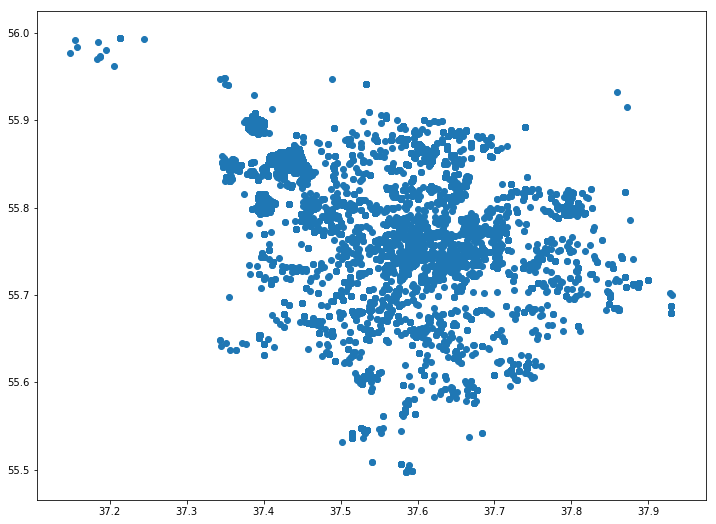

In [8]:
# plot map without vote
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,9))
plt.scatter(geocomm['x'], geocomm['y'])
plt.show()

In [9]:
# use kmeans and Hierarchical clustering to identify districts
from sklearn.cluster import KMeans, AgglomerativeClustering

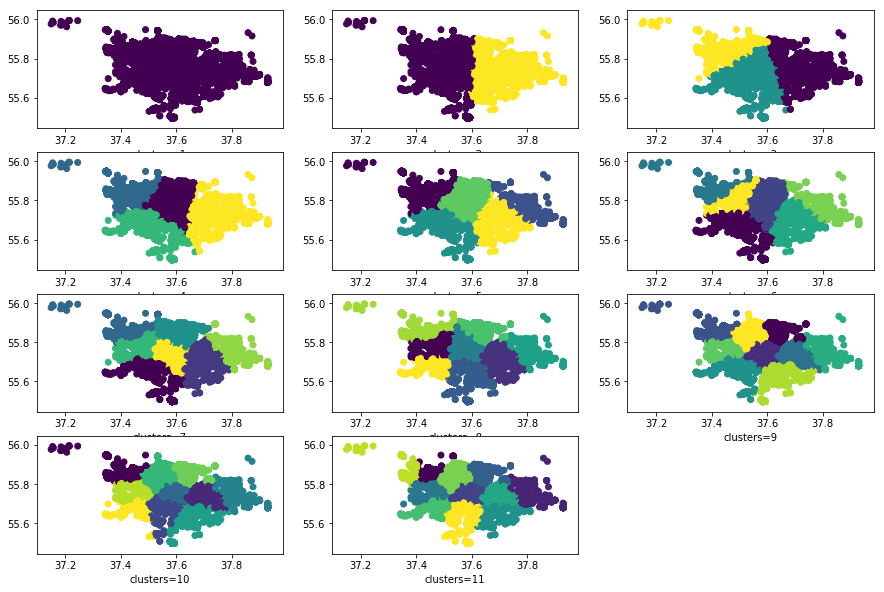

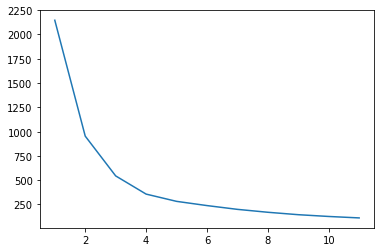

In [10]:
#try kmeans
clusters_limit = 12
plt.figure(figsize=(15,10))
k_inertia = []

for i in range (1,clusters_limit):
    clf_kmeans = KMeans(n_clusters=i)
    geo_clusters_kmeans = clf_kmeans.fit_predict(geo[['x','y']])
    k_inertia.append(clf_kmeans.inertia_)
    plt.subplot(4,3,i)
    plt.scatter(geo['x'], geo['y'],c=geo_clusters_kmeans)
    plt.xlabel(f'clusters={i}')
    
plt.show()
plt.plot( range(1,clusters_limit), k_inertia)

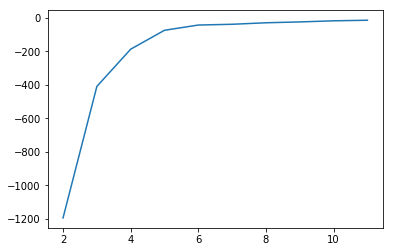

In [11]:
# визуально я бы выбрал 4
# но посчитаем
diff = np.diff(k_inertia)
plt.plot(range(2,clusters_limit), diff)

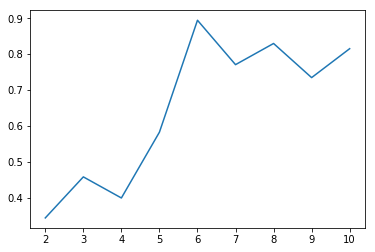

In [12]:
diff_r = diff[1:] / diff[:-1]
plt.plot(range(2,clusters_limit-1), diff_r)

In [13]:
# 4 is best clusters amount

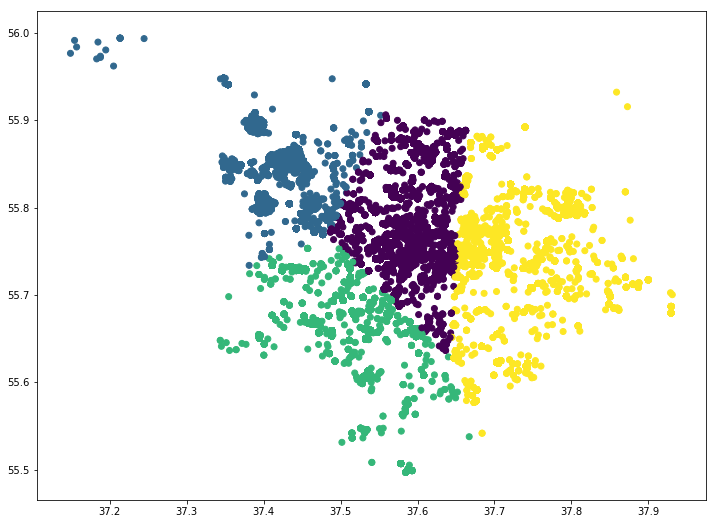

In [14]:
# in kmeans 4 clusters is optimal amount:
clf_kmeans = KMeans(n_clusters=4)
geo_clusters_kmeans = clf_kmeans.fit_predict(geo[['x','y']])
plt.figure(figsize=(12,9))
plt.scatter(geo['x'], geo['y'],c=geo_clusters_kmeans)
plt.show()

MemoryError: 

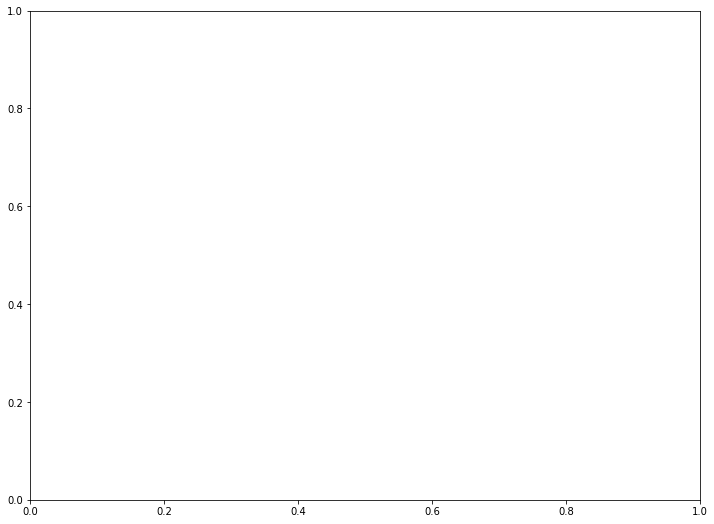

In [15]:
# try AgglomerativeClustering
clusters_limit = 12
plt.figure(figsize=(12,9))
plt.subplot(1,1,1)
k_inertia = []

for i in range (1,clusters_limit):
    clf_ac = AgglomerativeClustering(n_clusters=i)
    geo_clusters_ac = clf_ac.fit_predict(geo[['x','y']])
    k_inertia.append(clf_ac.inertia_)
    plt.subplot(4,3,i)
    plt.scatter(geo['x'], geo['y'],c=geo_clusters_ac)
    plt.xlabel(f'clusters={i}')
    
plt.show()
plt.plot( range(1,clusters_limit), k_inertia)

In [16]:
# not enough memory ??? I am with 16GB ram
# try DBscan
from sklearn.cluster import DBSCAN

In [17]:
clf_db = DBSCAN()
geo_clusters_db = clf_db.fit_predict(geo[['x','y']])
plt.figure(figsize=(12,9))
plt.scatter(geo['x'], geo['y'],c=geo_clusters_db)
plt.show()

MemoryError: 

In [18]:
# again not enough memory !
# repeat  kmeans for vote -1 and 1
geo_yes = geo[geo.comment_class == 1]
geo_no = geo[geo.comment_class == -1]
geo_yes.head()

,x,y,comment_class
28,37.588916,55.741982,1
45,37.589311,55.734273,1
46,37.558526,55.728758,1
47,37.566431,55.731794,1
61,37.589311,55.734273,1


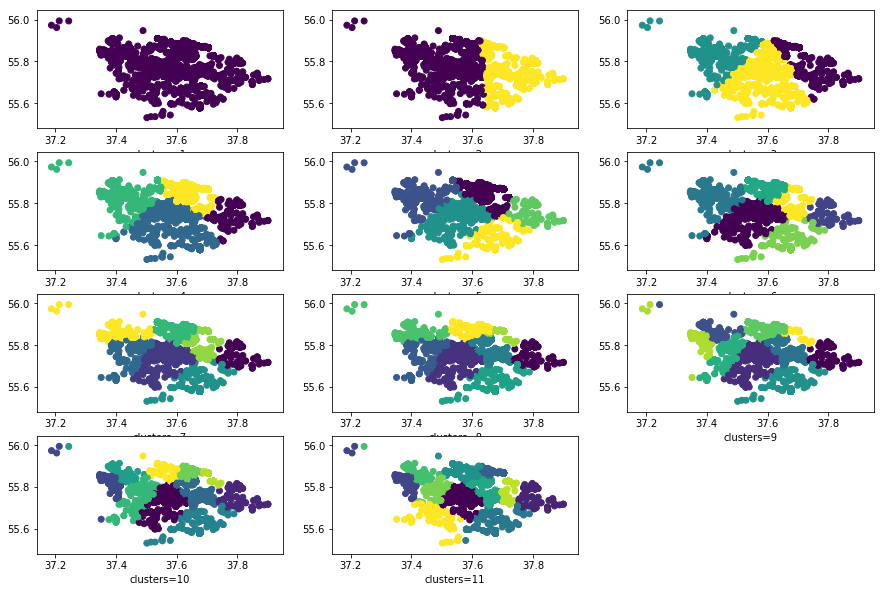

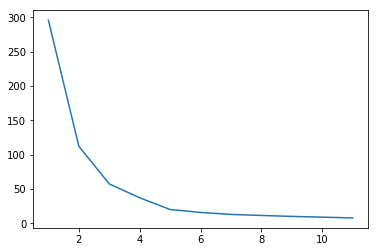

In [19]:
#try kmeans for yes
clusters_limit = 12
plt.figure(figsize=(15,10))
k_inertia = []

for i in range (1,clusters_limit):
    clf_kmeans = KMeans(n_clusters=i)
    geo_clusters_kmeans = clf_kmeans.fit_predict(geo_yes[['x','y']])
    k_inertia.append(clf_kmeans.inertia_)
    plt.subplot(4,3,i)
    plt.scatter(geo_yes['x'], geo_yes['y'],c=geo_clusters_kmeans)
    plt.xlabel(f'clusters={i}')
    
plt.show()
plt.plot( range(1,clusters_limit), k_inertia)

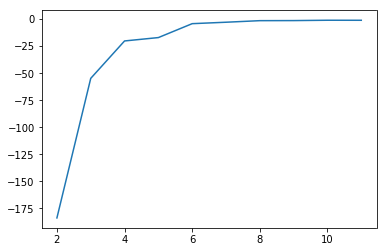

In [20]:
diff = np.diff(k_inertia)
plt.plot(range(2,clusters_limit), diff)

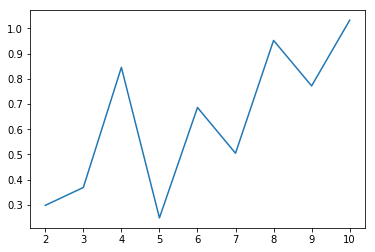

In [21]:
diff_r = diff[1:] / diff[:-1]
plt.plot(range(2,clusters_limit-1), diff_r)

In [22]:
# 4 (sometimes 5) is best clusters amount for "yes" voters

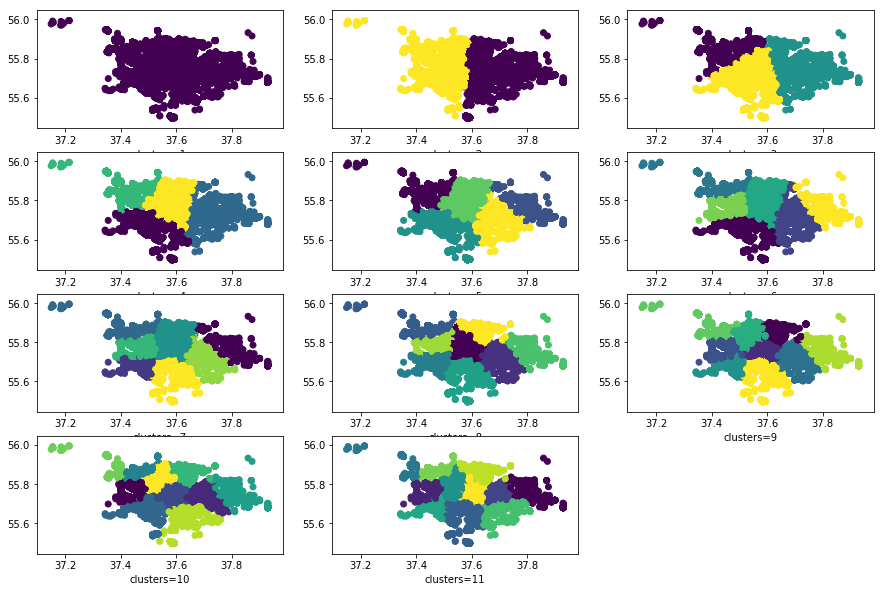

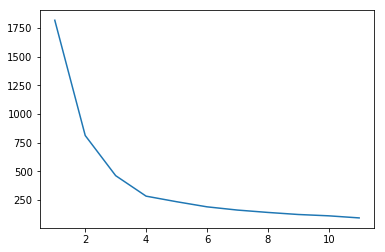

In [23]:
#try kmeans for no
clusters_limit = 12
plt.figure(figsize=(15,10))
k_inertia = []

for i in range (1,clusters_limit):
    clf_kmeans = KMeans(n_clusters=i)
    geo_clusters_kmeans = clf_kmeans.fit_predict(geo_no[['x','y']])
    k_inertia.append(clf_kmeans.inertia_)
    plt.subplot(4,3,i)
    plt.scatter(geo_no['x'], geo_no['y'],c=geo_clusters_kmeans)
    plt.xlabel(f'clusters={i}')
    
plt.show()
plt.plot( range(1,clusters_limit), k_inertia)

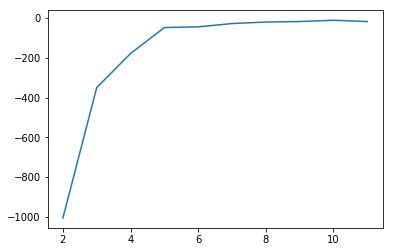

In [24]:
diff = np.diff(k_inertia)
plt.plot(range(2,clusters_limit), diff)

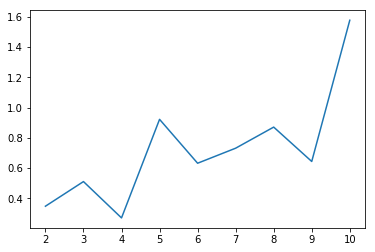

In [25]:
diff_r = diff[1:] / diff[:-1]
plt.plot(range(2,clusters_limit-1), diff_r)

In [26]:
# 4 is best clusters amount for "no" voters

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
# reduce data amount for Dscan and AgglomerativeClustering
geo = pd.read_excel('Clustering/geo.xlsx')
geo = geo.sample(30000)

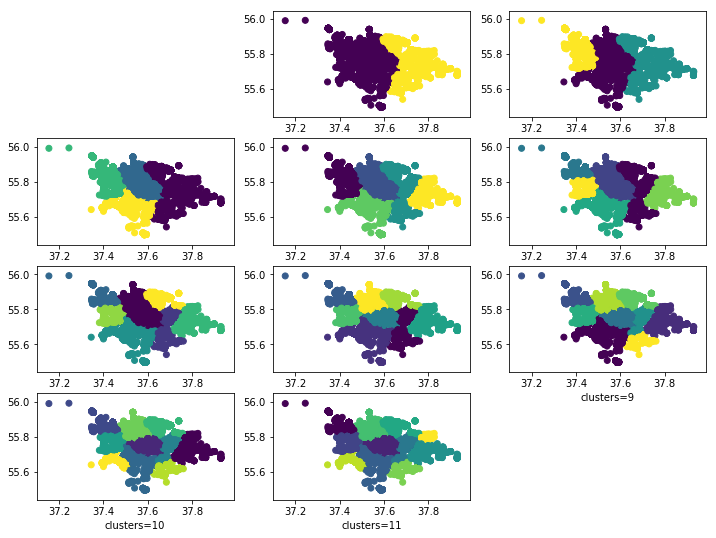

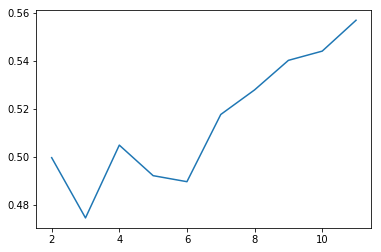

In [29]:
# try AgglomerativeClustering
clusters_limit = 12
plt.figure(figsize=(12,9))
scores = []

for i in range (2,clusters_limit):
    clf_ac = AgglomerativeClustering(n_clusters=i)
    geo_clusters_ac = clf_ac.fit_predict(geo[['x','y']])
    scores.append(silhouette_score(geo[['x','y']], geo_clusters_ac))
    
    plt.subplot(4,3,i)
    plt.scatter(geo['x'], geo['y'],c=geo_clusters_ac)
    plt.xlabel(f'clusters={i}')
    
plt.show()
plt.plot( range(2,clusters_limit), scores)

In [30]:
# 4 is best amount of clusters

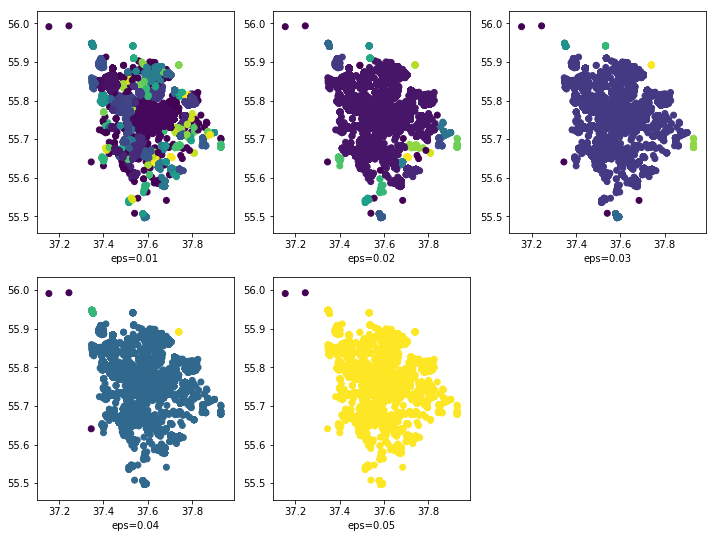

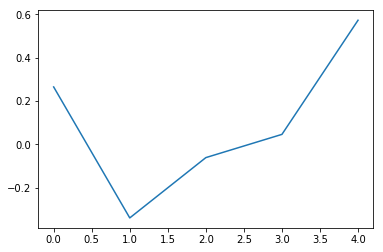

In [31]:
# try dbscan
epses = [0.01, 0.02, 0.03, 0.04, 0.05]
plt.figure(figsize=(12,9))
scores = []

for i in range(0,len(epses)):
    clf_db = DBSCAN(eps=epses[i])
    geo_clusters_db = clf_db.fit_predict(geo[['x','y']])
    scores.append(silhouette_score(geo[['x','y']], geo_clusters_db))
    
    plt.subplot(2,3,i+1)
    plt.scatter(geo['x'], geo['y'],c=geo_clusters_db)
    plt.xlabel(f'eps={epses[i]}')
    
plt.show()
plt.plot( range(0,len(epses)), scores)

In [ ]:
# dbscan result is bad !